In [1]:
# standard library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import sys
%matplotlib inline
import matplotlib.pyplot as plt


# without pip install
# sys.path.append("../")
!pip show fairxplainer


from fairxplainer.fair_explainer import FairXplainer
from fairxplainer.fair_explainer import plot as fif_plot
from fairxplainer import utils


sys.path.append("../")
from data.objects.adult import Adult
from data.objects.ricci import Ricci
from data.objects.titanic import Titanic
from data.objects.compas import Compas
from data.objects.german import German


Name: fairxplainer
Version: 0.4.0
Summary: A Python package for explaining bias in machine learning models
Home-page: https://github.com/ReAILe/bias-explainer
Author: Bishwamittra Ghosh
Author-email: bishwamittra.ghosh@gmail.com
License: MIT
Location: /Users/bishwamittraghosh/mambaforge-pypy3/envs/test/lib/python3.8/site-packages
Requires: 
Required-by: 


In [2]:
verbose = False
dataset_name = "compas"
if(dataset_name == "adult"):
    dataset = Adult(verbose=verbose, config=2) # config defines configuration for sensitive groups
    df = dataset.get_df()
elif(dataset_name == "ricci"):
    dataset = Ricci(verbose=verbose, config=0) # config defines configuration for sensitive groups
    df = dataset.get_df()
elif(dataset_name == "titanic"):
    dataset = Titanic(verbose=verbose, config=2) # config defines configuration for sensitive groups
    df = dataset.get_df()
elif(dataset_name == "compas"):
    dataset = Compas(verbose=verbose, config=1) # config defines configuration for sensitive groups
    df = dataset.get_df()
elif(dataset_name == "german"):
    dataset = German(verbose=verbose, config=2) # config defines configuration for sensitive groups
    df = dataset.get_df()
else:
    raise ValueError()


# get X,y
X = df.drop(['target'], axis=1)
y = df['target']

print(dataset.known_sensitive_attributes)
print(X.columns)

# one-hot encoding for categorical features (this takes care of Label encoding automatically)
X = utils.get_one_hot_encoded_df(X,dataset.categorical_attributes)

X.head(10)

['race']
Index(['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree'],
      dtype='object')


,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree
0,0,0.653846,0,0.0,0.000000,0.000000,0.000000,0
1,0,0.205128,0,0.0,0.000000,0.000000,0.000000,0
2,0,0.076923,0,0.0,0.000000,0.058824,0.105263,0
3,0,0.064103,0,0.0,0.076923,0.000000,0.026316,0
4,0,0.320513,0,0.0,0.000000,0.000000,0.052632,0
5,0,0.333333,0,0.0,0.000000,0.000000,0.000000,1
6,0,0.294872,1,0.0,0.000000,0.000000,0.368421,0
7,0,0.320513,0,0.0,0.000000,0.000000,0.078947,0
8,1,0.269231,1,0.0,0.000000,0.000000,0.000000,1
9,0,0.038462,1,0.0,0.000000,0.000000,0.026316,0


In [3]:
clf = LogisticRegression()
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# clf = SVC()
clf.fit(X.values, y.values)

LogisticRegression()

## Fairness explanation using (co)variance decomposition

In [4]:
fairXplainer = FairXplainer(clf, X, dataset.known_sensitive_attributes)
fairXplainer.compute(maxorder=2, spline_intervals=6, verbose=False)

/Users/bishwamittraghosh/mambaforge-pypy3/envs/test/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/bishwamittraghosh/mambaforge-pypy3/envs/test/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Individual FIFs

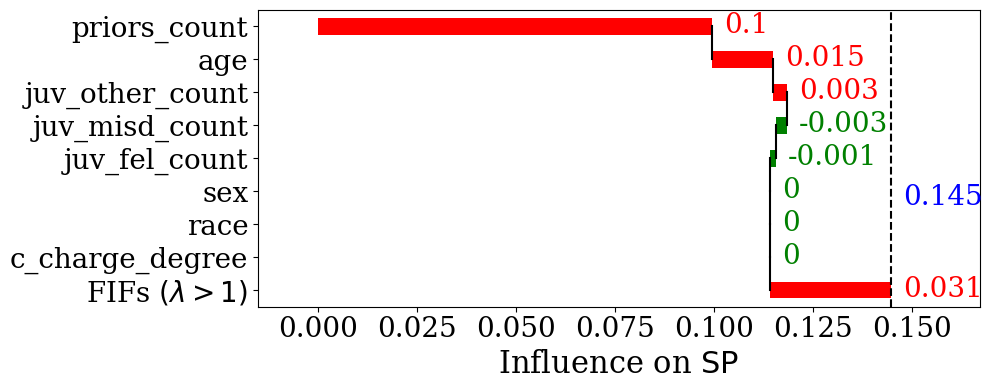

Exact statistical parity 0.1747909432721744


<Figure size 1000x400 with 0 Axes>

In [5]:
result = fairXplainer.get_weights()

fontsize = 22
labelsize = 20

plt = fif_plot(result, 
                draw_waterfall=True, 
                labelsize=labelsize, 
                figure_size=(10,4), 
                text_y_pad=0.2, 
                xlim=None, 
                result_y_location=0.6,
                x_label="Influence on " + r"$ \mathsf{SP} $"
            )
plt.show()
plt.clf()
print("Exact statistical parity", fairXplainer.statistical_parity_sample())

### Intersectional FIFs

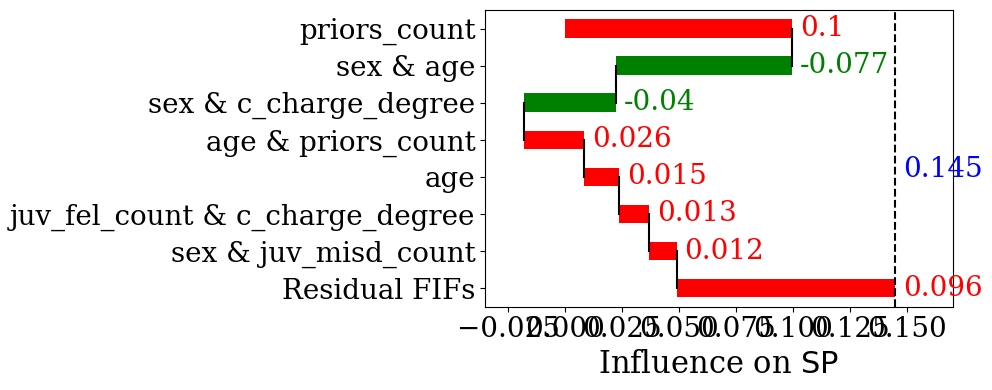

Exact statistical parity 0.1747909432721744


<Figure size 1000x400 with 0 Axes>

In [6]:
k = 7
result = fairXplainer.get_top_k_weights(k=k)

plt = fif_plot(result, 
               draw_waterfall=True, 
               labelsize=labelsize, 
               figure_size=(10,4), 
               text_y_pad=0.2, 
               xlim=None, 
               result_x_pad=0.02,
               x_label="Influence on " + r"$ \mathsf{SP} $"
        )
plt.tight_layout()
plt.show()
plt.clf()

print("Exact statistical parity", fairXplainer.statistical_parity_sample())

### SHAP method

/Users/bishwamittraghosh/mambaforge-pypy3/envs/test/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/bishwamittraghosh/mambaforge-pypy3/envs/test/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-ji

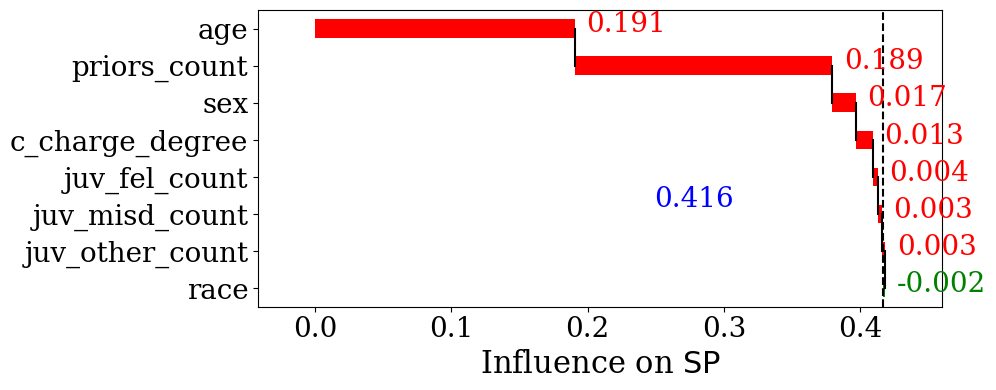

Exact statistical parity 0.1747909432721744


<Figure size 1000x400 with 0 Axes>

In [7]:
from fairxplainer.wrapper.shap_fairness_explanation import ShapExplanation, row_masking_based_on_sensitive_groups
max_group_mask, min_group_mask = row_masking_based_on_sensitive_groups(clf, X, dataset.known_sensitive_attributes)
shapExplanation = ShapExplanation()
result_shap, exact_SP = shapExplanation.compute(clf, X, max_group_mask, min_group_mask, "lr", verbose=False)


plt = fif_plot(result_shap, 
               draw_waterfall=True, 
               labelsize=labelsize, 
               figure_size=(10,4), 
               result_y_location=0.6, 
               result_x_pad=-0.4,
        x_label="Influence on " + r"$ \mathsf{SP} $")

plt.show()
plt.clf()

print("Exact statistical parity", exact_SP)